# Fibonacci

[1, 1, 2, 3, 5, 8, ]

F1 = 1
F2 = 1
Fn = Fn-1 + Fn-2

In [58]:
def fibonacci_rec(n: int):
  if (n <= 0): 
    return 0
  
  if(n == 1 or n == 2): 
    return 1
  
  return fibonacci_rec(n-1) + fibonacci_rec(n-2)


In [59]:
def fibonacci_lin(n: int):
  if(n < 1): 
    raise Exception('n should be higher than 1')
  
  res = 1
  for i in range(n-1):
    res+= i

  return res

In [60]:
state = {}

def fibonacci_din(n: int):
  if (n <= 0): 
    return 0
  
  if(n == 1 or n == 2): 
    return 1
  
  a = state[n-1] if n-1 in state else fibonacci_din(n-1)
  b = state[n-2] if n-2 in state else fibonacci_din(n-2)

  state[n] = a + b
  return state[n]

print(fibonacci_din(4))

3


In [61]:
import time

fibonacci_rec_time = []
fibonacci_lin_time = []
fibonacci_din_time = []
laps = []

laps_amount = 10
max_n = 30

for i in range(1, laps_amount):
    n = int(max_n / laps_amount * i)
    laps.append(n)

    start = time.perf_counter()
    res = fibonacci_rec(n)
    end = time.perf_counter()
    fibonacci_rec_time.append(end - start)

    start = time.perf_counter()
    j = fibonacci_lin(n)
    end = time.perf_counter()
    fibonacci_lin_time.append(end - start)
    
    start = time.perf_counter()
    j = fibonacci_din(n)
    end = time.perf_counter()
    fibonacci_din_time.append(end - start)

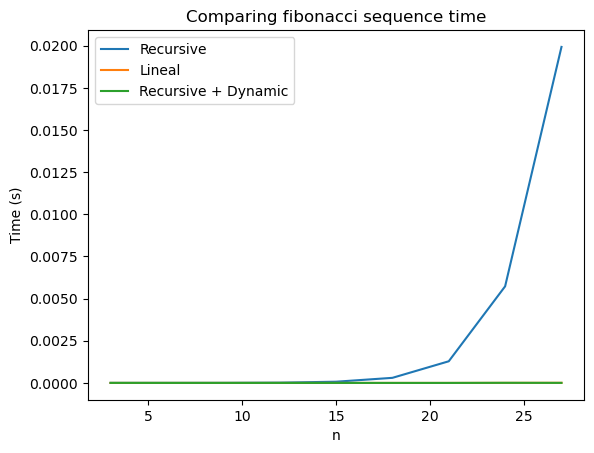

In [62]:
import matplotlib.pyplot as plt

plt.plot(laps, fibonacci_rec_time, label="Recursive")
plt.plot(laps, fibonacci_lin_time, label="Lineal")
plt.plot(laps, fibonacci_din_time, label="Recursive + Dynamic")
plt.legend()
plt.title("Comparing fibonacci sequence time")
plt.xlabel("n")
plt.ylabel("Time (s)")
plt.show()
